<a href="https://colab.research.google.com/github/mkumar312/Agentic-AI-Generative-AI-ML-DA-FSDC_CODES_EXPERTISE/blob/main/Image_binary_class_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!nvidia-smi


Sat Feb  7 14:20:55 2026       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   63C    P8             11W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import cv2
import os

# image data generator is the package to lable the images & it will automatical


In [ ]:
img = image.load_img('/content/drive/MyDrive/CNN_07_FEB/training/happy/27.jpg')

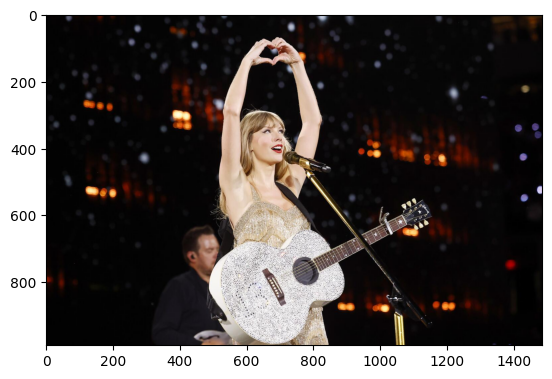

In [ ]:
plt.imshow(img)

In [ ]:
i1 = cv2.imread('/content/drive/MyDrive/CNN_07_FEB/training/happy/27.jpg')
i1
# 3 dimension metrics are created for the image
# the value ranges from 0-255
# image is converted to array by keras

array([[[ 2,  4, 12],
        [ 2,  4, 12],
        [ 2,  4, 12],
        ...,
        [16, 31, 50],
        [14, 31, 50],
        [13, 30, 49]],

       [[ 2,  4, 12],
        [ 2,  4, 12],
        [ 2,  4, 12],
        ...,
        [17, 32, 51],
        [14, 31, 50],
        [14, 31, 50]],

       [[ 4,  3, 12],
        [ 4,  3, 12],
        [ 4,  3, 12],
        ...,
        [15, 32, 51],
        [15, 32, 51],
        [15, 32, 51]],

       ...,

       [[ 2,  2,  2],
        [ 2,  2,  2],
        [ 2,  2,  2],
        ...,
        [ 1,  1,  1],
        [ 1,  1,  1],
        [ 1,  1,  1]],

       [[ 2,  2,  2],
        [ 2,  2,  2],
        [ 2,  2,  2],
        ...,
        [ 1,  1,  1],
        [ 1,  1,  1],
        [ 1,  1,  1]],

       [[ 2,  2,  2],
        [ 2,  2,  2],
        [ 2,  2,  2],
        ...,
        [ 1,  1,  1],
        [ 1,  1,  1],
        [ 1,  1,  1]]], dtype=uint8)

In [ ]:
i1.shape

(990, 1486, 3)

In [ ]:
train = ImageDataGenerator(rescale = 1/200)
validation = ImageDataGenerator(rescale = 1/200)
testing = ImageDataGenerator(rescale=1./255)

# to scale all the images I need to divide with 255
# we need to resize the image using 200,200 pixel


In [ ]:
train_dataset = train.flow_from_directory('/content/drive/MyDrive/CNN_07_FEB/training',
                                          target_size = (200,200),
                                          batch_size = 32,
                                          class_mode = 'binary')

validataion_dataset = validation.flow_from_directory('/content/drive/MyDrive/CNN_07_FEB/validation',
                                                      target_size = (200,200),
                                                      batch_size = 32,
                                                      class_mode = 'binary')

test_dataset= testing.flow_from_directory('/content/drive/MyDrive/CNN_07_FEB/testing',
                                                      target_size = (200,200),
                                                      batch_size = 32,
                                                      class_mode = 'binary')
#Keras counts only files that:

#✔ Are inside class subfolders
#✔ Have supported image extensions (.jpg, .jpeg, .png, .bmp, .gif)
#✔ Are not corrupted
#✔ Are not hidden/system files

#So your real count on disk (what you see in Drive UI) ≠ what Keras can read.


Found 40 images belonging to 2 classes.
Found 0 images belonging to 2 classes.
Found 0 images belonging to 0 classes.


In [ ]:
train_dataset.class_indices

# Machine cannot understand faces, only labels

{'happy': 0, 'not happy': 1}

In [ ]:
# now we are applying maxpooling

model = tf.keras.models.Sequential([ tf.keras.layers.Conv2D(16,(3,3),activation = 'relu',input_shape = (200,200,3)),
                                     tf.keras.layers.MaxPool2D(2,2), #3 filtr we applied hear
                                     #
                                     tf.keras.layers.Conv2D(32,(3,3),activation = 'relu'),
                                     tf.keras.layers.MaxPool2D(2,2),
                                     #
                                     tf.keras.layers.Conv2D(64,(3,3),activation = 'relu'),
                                     tf.keras.layers.MaxPool2D(2,2),
                                     ##
                                     tf.keras.layers.Flatten(),
                                     ##
                                     tf.keras.layers.Dense(512, activation = 'relu'),
                                     #
                                     tf.keras.layers.Dense(1, activation = 'sigmoid')
                                   ])


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(loss='binary_crossentropy',
              optimizer = tf.keras.optimizers.RMSprop(learning_rate = 0.001),
              metrics = ['accuracy'])


In [ ]:
model_fit = model.fit(train_dataset,epochs = 10)


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 8s 3s/step - accuracy: 0.5542 - loss: 4.2295
Epoch 2/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 147ms/step - accuracy: 0.4250 - loss: 4.8517
Epoch 3/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 586ms/step - accuracy: 0.5333 - loss: 0.7847
Epoch 4/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 288ms/step - accuracy: 0.5604 - loss: 0.6232
Epoch 5/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 710ms/step - accuracy: 0.6333 - loss: 0.6835
Epoch 6/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 552ms/step - accuracy: 0.3917 - loss: 1.7209
Epoch 7/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 108ms/step - accuracy: 0.6958 - loss: 0.5700
Epoch 8/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 109ms/step - accuracy: 0.7167 - loss: 0.5006
Epoch 9/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 763ms/step - accuracy: 0.7833 - loss: 0.5031
Epoch 10/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step - accuracy: 0.9229 - loss: 0.3841 


In [ ]:
dir_path = '/content/drive/MyDrive/CNN_07_FEB/testing'
for i in os.listdir(dir_path ):
    print(i)


16.jpg
20.jpg
9.avif
24.jpg
25.jpg
22.webp


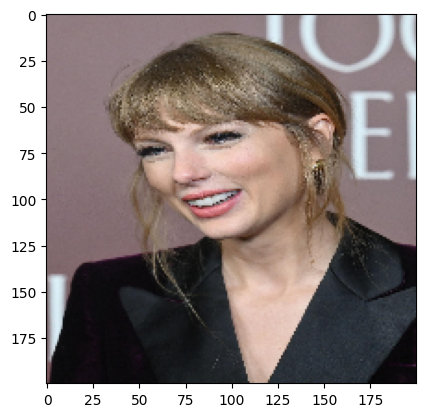

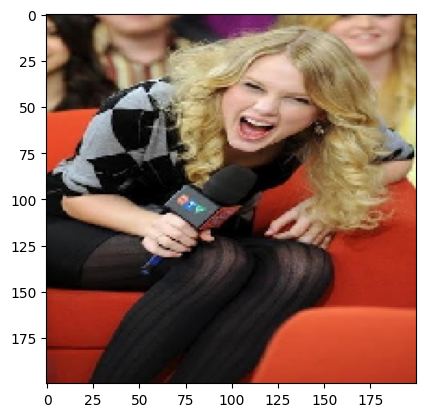

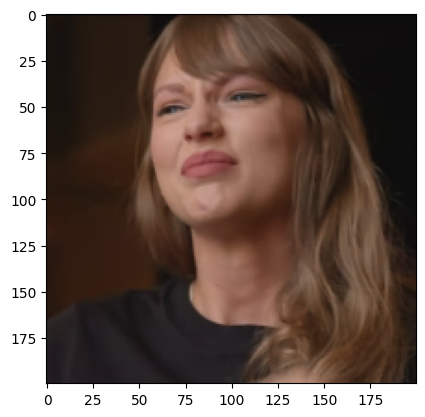

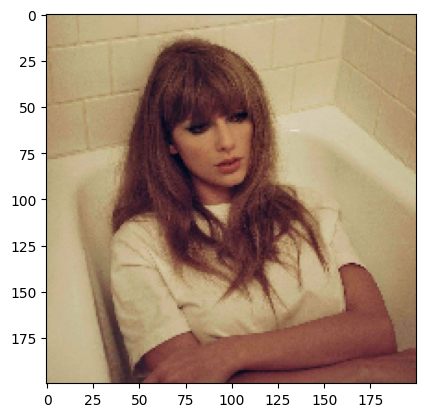

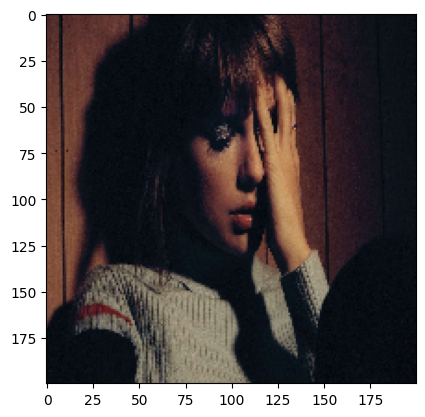

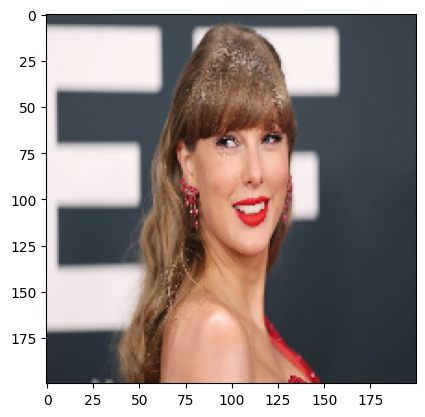

In [ ]:
dir_path = '/content/drive/MyDrive/CNN_07_FEB/testing'

for i in os.listdir(dir_path ):
    img = image.load_img(dir_path+ '//'+i, target_size = (200,200))
    plt.imshow(img)
    plt.show()


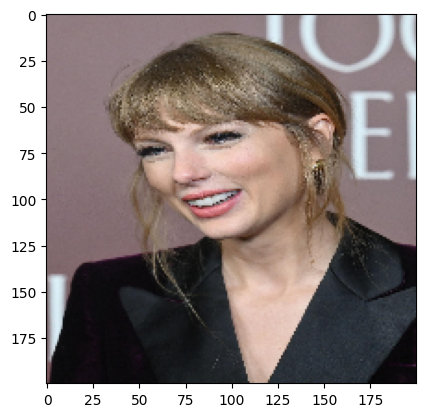

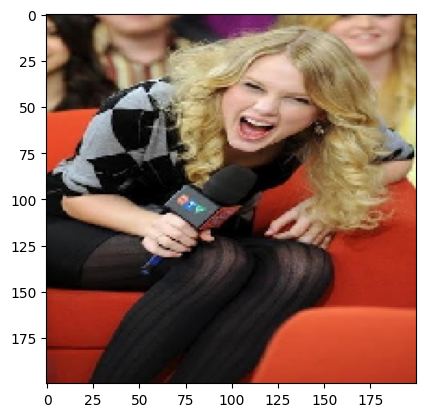

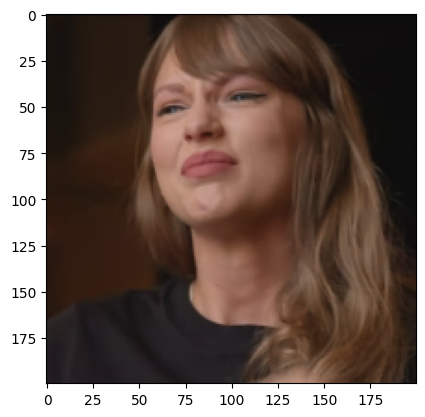

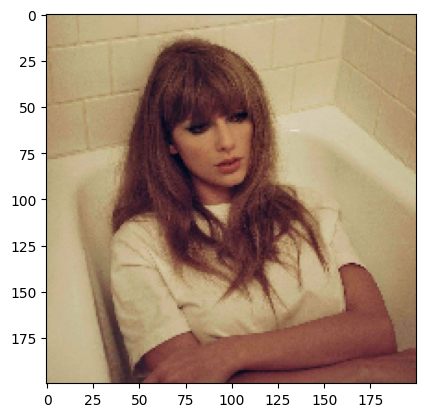

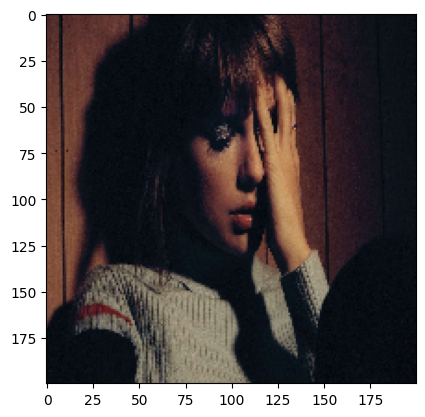

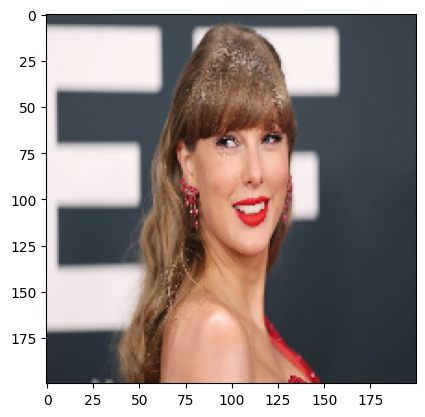

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 744ms/step
i am not happy


In [ ]:

for i in os.listdir(dir_path ):
    img = image.load_img(dir_path+ '//'+i, target_size = (200,200))
    plt.imshow(img)
    plt.show()

x = image.img_to_array(img)
x = np.expand_dims(x,axis = 0)
images = np.vstack([x])

val = model.predict(images)
if val == 0:
    print('i am happy')
else:
    print('i am not happy')


frontend using gradio

In [ ]:
import gradio as gr
from PIL import Image
import numpy as np

def predict_mood(image):
    # Resize the image to (200, 200) as expected by the model
    img = image.resize((200, 200))
    # Convert the image to a numpy array
    x = np.array(img)
    # Expand dimensions to create a batch of 1 image
    x = np.expand_dims(x, axis=0)
    # Normalize the image (if the model was trained with normalized inputs)
    # The model was trained with rescale=1/200, so we should apply the same scaling here.
    x = x / 200.0
    # Make prediction
    val = model.predict(x)[0][0]
    # Interpret the prediction
    if val < 0.5:
        return 'Happy'
    else:
        return 'Not Happy'

In [ ]:
iface = gr.Interface(fn=predict_mood,
                     inputs=gr.Image(type="pil", label="Upload an image"),
                     outputs=gr.Text(label="Predicted Mood"),
                     title="Mood Classification (Happy/Not Happy)",
                     description="Upload an image to classify if the person is happy or not happy.")

iface.launch()


It looks like you are running Gradio on a hosted Jupyter notebook, which requires `share=True`. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://eb242ae27e1f36b036.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
